In [ ]:
import tensorflow as tf
import torch.nn as nn
import scipy
import numpy as np

# Read in Data

In [ ]:
!wget https://raw.githubusercontent.com/AI-Group-4-Classification-of-alcohols/TermProject/main/QCM7.csv

--2023-04-21 05:18:16--  https://raw.githubusercontent.com/AI-Group-4-Classification-of-alcohols/TermProject/main/QCM7.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2219 (2.2K) [text/plain]
Saving to: ‘QCM7.csv’

QCM7.csv            100%[===================>]   2.17K  --.-KB/s    in 0s      

2023-04-21 05:18:16 (33.0 MB/s) - ‘QCM7.csv’ saved [2219/2219]



In [ ]:
import pandas as pd 
QCM7 = pd.read_csv("QCM7.csv", sep=";", dtype=np.float32)

In [ ]:
QCM7.head()

0.799_0.201  0.799_0.201.1  0.700_0.300  0.700_0.300.1  0.600_0.400  \
0       -11.23     -14.210000   -18.709999     -22.650000   -27.320000   
1       -12.44     -15.440000   -21.129999     -25.530001   -30.450001   
2       -13.75     -16.719999   -24.000000     -28.290001   -33.910000   
3       -15.05     -17.980000   -26.420000     -30.650000   -36.560001   
4       -16.67     -19.110001   -28.690001     -32.580002   -39.619999   

   0.600_0.400.1  0.501_0.499  0.501_0.499.1  0.400_0.600  0.400_0.600.1  \
0     -32.389999   -35.279999     -40.720001   -40.630001     -49.869999   
1     -36.220001   -36.849998     -45.110001   -45.400002     -55.160000   
2     -39.950001   -40.959999     -49.430000   -49.910000     -60.110001   
3     -43.000000   -43.810001     -52.730000   -53.889999     -64.349998   
4     -45.680000   -47.160000     -55.650002   -57.200001     -67.680000   

   1-Octanol  1-Propanol  2-Butanol  2-propanol  1-isobutanol  
0        1.0         0.0        0.0         0.0           0.0  
1        1.0         0.0        0.0         0.0           0.0  
2        1.0         0.0        0.0         0.0           0.0  
3        1.0         0.0        0.0         0.0           0.0  
4        1.0         0.0        0.0         0.0           0.0

# Build ANN Model

In [ ]:
X = QCM7.iloc[:,0:10].values
y = QCM7.iloc[:, [10,11,12,13,14]].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0) 

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#SGD Model

In [ ]:
model_sgd1 = tf.keras.Sequential()
model_sgd1.add(tf.keras.layers.Dense(units=40, activation="sigmoid",input_shape=(10,)))
model_sgd1.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd1.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd1 = model_sgd1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 56ms/step - loss: 0.0959 - accuracy: 0.7333 - val_loss: 0.1333 - val_accuracy: 0.3000
Epoch 7502/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.0959 - accuracy: 0.7333 - val_loss: 0.1333 - val_accuracy: 0.3000
Epoch 7503/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0959 - accuracy: 0.7333 - val_loss: 0.1333 - val_accuracy: 0.3000
Epoch 7504/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0959 - accuracy: 0.7333 - val_loss: 0.1333 - val_accuracy: 0.3000
Epoch 7505/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.0959 - accuracy: 0.7333 - val_loss: 0.1333 - val_accuracy: 0.3000
Epoch 7506/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.0959 - accuracy: 0.7333 - val_loss: 0.1333 - val_accuracy: 0.3000
Epoch 7507/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0959 - accuracy: 

In [ ]:
model_sgd2 = tf.keras.Sequential()
model_sgd2.add(tf.keras.layers.Dense(units=50, activation="sigmoid",input_shape=(10,)))
model_sgd2.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd2.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd2 = model_sgd2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 49ms/step - loss: 0.0975 - accuracy: 0.5333 - val_loss: 0.1354 - val_accuracy: 0.2000
Epoch 7502/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0975 - accuracy: 0.5333 - val_loss: 0.1353 - val_accuracy: 0.2000
Epoch 7503/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0975 - accuracy: 0.5333 - val_loss: 0.1353 - val_accuracy: 0.2000
Epoch 7504/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0975 - accuracy: 0.5333 - val_loss: 0.1353 - val_accuracy: 0.2000
Epoch 7505/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0975 - accuracy: 0.5333 - val_loss: 0.1353 - val_accuracy: 0.2000
Epoch 7506/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0975 - accuracy: 0.5333 - val_loss: 0.1353 - val_accuracy: 0.2000
Epoch 7507/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0975 - accuracy: 

In [ ]:
model_sgd3 = tf.keras.Sequential()
model_sgd3.add(tf.keras.layers.Dense(units=60, activation="sigmoid",input_shape=(10,)))
model_sgd3.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd3.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd3 = model_sgd3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 57ms/step - loss: 0.0961 - accuracy: 0.6667 - val_loss: 0.1335 - val_accuracy: 0.3000
Epoch 7502/10000
1/1 [==============================] - 0s 87ms/step - loss: 0.0961 - accuracy: 0.6667 - val_loss: 0.1335 - val_accuracy: 0.3000
Epoch 7503/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.0961 - accuracy: 0.6667 - val_loss: 0.1335 - val_accuracy: 0.3000
Epoch 7504/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0961 - accuracy: 0.6667 - val_loss: 0.1335 - val_accuracy: 0.3000
Epoch 7505/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.0961 - accuracy: 0.6667 - val_loss: 0.1335 - val_accuracy: 0.3000
Epoch 7506/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0961 - accuracy: 0.6667 - val_loss: 0.1335 - val_accuracy: 0.3000
Epoch 7507/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0961 - accuracy: 

In [ ]:
model_sgd4 = tf.keras.Sequential()
model_sgd4.add(tf.keras.layers.Dense(units=70, activation="sigmoid",input_shape=(10,)))
model_sgd4.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd4.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd4 = model_sgd4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 49ms/step - loss: 0.0973 - accuracy: 0.6667 - val_loss: 0.1396 - val_accuracy: 0.3000
Epoch 7502/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0973 - accuracy: 0.6667 - val_loss: 0.1396 - val_accuracy: 0.3000
Epoch 7503/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.0973 - accuracy: 0.6667 - val_loss: 0.1396 - val_accuracy: 0.3000
Epoch 7504/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0973 - accuracy: 0.6667 - val_loss: 0.1396 - val_accuracy: 0.3000
Epoch 7505/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0973 - accuracy: 0.6667 - val_loss: 0.1396 - val_accuracy: 0.3000
Epoch 7506/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0973 - accuracy: 0.6667 - val_loss: 0.1396 - val_accuracy: 0.3000
Epoch 7507/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0973 - accuracy: 

In [ ]:
model_sgd5 = tf.keras.Sequential()
model_sgd5.add(tf.keras.layers.Dense(units=80, activation="sigmoid",input_shape=(10,)))
model_sgd5.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd5.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd5 = model_sgd5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 58ms/step - loss: 0.0950 - accuracy: 0.6667 - val_loss: 0.1336 - val_accuracy: 0.3000
Epoch 7502/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0950 - accuracy: 0.6667 - val_loss: 0.1336 - val_accuracy: 0.3000
Epoch 7503/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0950 - accuracy: 0.6667 - val_loss: 0.1336 - val_accuracy: 0.3000
Epoch 7504/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.0950 - accuracy: 0.6667 - val_loss: 0.1336 - val_accuracy: 0.3000
Epoch 7505/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.0950 - accuracy: 0.6667 - val_loss: 0.1336 - val_accuracy: 0.3000
Epoch 7506/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.0949 - accuracy: 0.6667 - val_loss: 0.1336 - val_accuracy: 0.3000
Epoch 7507/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0949 - accuracy: 

In [ ]:
model_sgd6 = tf.keras.Sequential()
model_sgd6.add(tf.keras.layers.Dense(units=90, activation="sigmoid",input_shape=(10,)))
model_sgd6.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_sgd6.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
history_sgd6 = model_sgd6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.0949 - accuracy: 0.6667 - val_loss: 0.1328 - val_accuracy: 0.3000
Epoch 7502/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.0949 - accuracy: 0.6667 - val_loss: 0.1328 - val_accuracy: 0.3000
Epoch 7503/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0949 - accuracy: 0.6667 - val_loss: 0.1328 - val_accuracy: 0.3000
Epoch 7504/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0949 - accuracy: 0.6667 - val_loss: 0.1328 - val_accuracy: 0.3000
Epoch 7505/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.0949 - accuracy: 0.6667 - val_loss: 0.1328 - val_accuracy: 0.3000
Epoch 7506/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0949 - accuracy: 0.6667 - val_loss: 0.1328 - val_accuracy: 0.3000
Epoch 7507/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.

# Adam Model

In [ ]:
model_adam1 = tf.keras.Sequential()
model_adam1.add(tf.keras.layers.Dense(units=40, activation="sigmoid",input_shape=(10,)))
model_adam1.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam1 = model_adam1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 72ms/step - loss: 2.9995e-05 - accuracy: 1.0000 - val_loss: 4.7490e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 91ms/step - loss: 2.9978e-05 - accuracy: 1.0000 - val_loss: 4.7473e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 69ms/step - loss: 2.9961e-05 - accuracy: 1.0000 - val_loss: 4.7456e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 51ms/step - loss: 2.9944e-05 - accuracy: 1.0000 - val_loss: 4.7439e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 58ms/step - loss: 2.9927e-05 - accuracy: 1.0000 - val_loss: 4.7422e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 71ms/step - loss: 2.9910e-05 - accuracy: 1.0000 - val_loss: 4.7405e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam2 = tf.keras.Sequential()
model_adam2.add(tf.keras.layers.Dense(units=50, activation="sigmoid",input_shape=(10,)))
model_adam2.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam2 = model_adam2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 57ms/step - loss: 2.2557e-05 - accuracy: 1.0000 - val_loss: 9.6497e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 62ms/step - loss: 2.2544e-05 - accuracy: 1.0000 - val_loss: 9.6472e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 86ms/step - loss: 2.2531e-05 - accuracy: 1.0000 - val_loss: 9.6448e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 80ms/step - loss: 2.2519e-05 - accuracy: 1.0000 - val_loss: 9.6423e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 78ms/step - loss: 2.2506e-05 - accuracy: 1.0000 - val_loss: 9.6398e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 79ms/step - loss: 2.2493e-05 - accuracy: 1.0000 - val_loss: 9.6374e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam3 = tf.keras.Sequential()
model_adam3.add(tf.keras.layers.Dense(units=60, activation="sigmoid",input_shape=(10,)))
model_adam3.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam3.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam3 = model_adam3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 48ms/step - loss: 2.0047e-05 - accuracy: 1.0000 - val_loss: 6.3122e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 82ms/step - loss: 2.0036e-05 - accuracy: 1.0000 - val_loss: 6.3105e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 75ms/step - loss: 2.0024e-05 - accuracy: 1.0000 - val_loss: 6.3088e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 66ms/step - loss: 2.0013e-05 - accuracy: 1.0000 - val_loss: 6.3071e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 71ms/step - loss: 2.0002e-05 - accuracy: 1.0000 - val_loss: 6.3054e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 76ms/step - loss: 1.9991e-05 - accuracy: 1.0000 - val_loss: 6.3037e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam4 = tf.keras.Sequential()
model_adam4.add(tf.keras.layers.Dense(units=70, activation="sigmoid",input_shape=(10,)))
model_adam4.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam4.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam4 = model_adam4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 69ms/step - loss: 1.9344e-05 - accuracy: 1.0000 - val_loss: 5.4759e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 69ms/step - loss: 1.9333e-05 - accuracy: 1.0000 - val_loss: 5.4742e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 62ms/step - loss: 1.9322e-05 - accuracy: 1.0000 - val_loss: 5.4724e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 51ms/step - loss: 1.9311e-05 - accuracy: 1.0000 - val_loss: 5.4706e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 64ms/step - loss: 1.9300e-05 - accuracy: 1.0000 - val_loss: 5.4689e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 65ms/step - loss: 1.9289e-05 - accuracy: 1.0000 - val_loss: 5.4671e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam5 = tf.keras.Sequential()
model_adam5.add(tf.keras.layers.Dense(units=80, activation="sigmoid",input_shape=(10,)))
model_adam5.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam5.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam5 = model_adam5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 56ms/step - loss: 1.9042e-05 - accuracy: 1.0000 - val_loss: 8.2440e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 58ms/step - loss: 1.9031e-05 - accuracy: 1.0000 - val_loss: 8.2419e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 52ms/step - loss: 1.9021e-05 - accuracy: 1.0000 - val_loss: 8.2398e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 61ms/step - loss: 1.9010e-05 - accuracy: 1.0000 - val_loss: 8.2378e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 58ms/step - loss: 1.8999e-05 - accuracy: 1.0000 - val_loss: 8.2357e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 60ms/step - loss: 1.8988e-05 - accuracy: 1.0000 - val_loss: 8.2336e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==========================

In [ ]:
model_adam6 = tf.keras.Sequential()
model_adam6.add(tf.keras.layers.Dense(units=90, activation="sigmoid",input_shape=(10,)))
model_adam6.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_adam6.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history_adam6 = model_adam6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 [==============================] - 0s 64ms/step - loss: 1.2665e-05 - accuracy: 1.0000 - val_loss: 7.6127e-04 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 84ms/step - loss: 1.2657e-05 - accuracy: 1.0000 - val_loss: 7.6106e-04 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 66ms/step - loss: 1.2650e-05 - accuracy: 1.0000 - val_loss: 7.6086e-04 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 75ms/step - loss: 1.2643e-05 - accuracy: 1.0000 - val_loss: 7.6066e-04 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 66ms/step - loss: 1.2636e-05 - accuracy: 1.0000 - val_loss: 7.6046e-04 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 63ms/step - loss: 1.2629e-05 - accuracy: 1.0000 - val_loss: 7.6026e-04 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [=========

# RMSProp Model


In [ ]:
model_rms1 = tf.keras.Sequential()
model_rms1.add(tf.keras.layers.Dense(units=40, activation="sigmoid",input_shape=(10,)))
model_rms1.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms1.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms1 = model_rms1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 66ms/step - loss: 9.6980e-05 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 56ms/step - loss: 9.6963e-05 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 60ms/step - loss: 9.6947e-05 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 57ms/step - loss: 9.6931e-05 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 59ms/step - loss: 9.6915e-05 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 42ms/step - loss: 9.6899e-05 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==============================] - 0s 58ms/step - l

In [ ]:
model_rms2 = tf.keras.Sequential()
model_rms2.add(tf.keras.layers.Dense(units=50, activation="sigmoid",input_shape=(10,)))
model_rms2.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms2.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms2 = model_rms2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 42ms/step - loss: 8.6978e-05 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 41ms/step - loss: 8.6963e-05 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 42ms/step - loss: 8.6949e-05 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 43ms/step - loss: 8.6934e-05 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 42ms/step - loss: 8.6920e-05 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 42ms/step - loss: 8.6905e-05 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==============================] - 0s 41ms/step - l

In [ ]:
model_rms3 = tf.keras.Sequential()
model_rms3.add(tf.keras.layers.Dense(units=60, activation="sigmoid",input_shape=(10,)))
model_rms3.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms3.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms3 = model_rms3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 66ms/step - loss: 8.3251e-05 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 66ms/step - loss: 8.3237e-05 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 62ms/step - loss: 8.3223e-05 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 60ms/step - loss: 8.3210e-05 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 55ms/step - loss: 8.3196e-05 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 41ms/step - loss: 8.3182e-05 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==============================] - 0s 41ms/step - l

In [ ]:
model_rms4 = tf.keras.Sequential()
model_rms4.add(tf.keras.layers.Dense(units=70, activation="sigmoid",input_shape=(10,)))
model_rms4.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms4.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms4 = model_rms4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 50ms/step - loss: 7.8816e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 56ms/step - loss: 7.8803e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 59ms/step - loss: 7.8789e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 39ms/step - loss: 7.8776e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 56ms/step - loss: 7.8763e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 57ms/step - loss: 7.8750e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==============================] - 0s 41ms/step - l

In [ ]:
model_rms5 = tf.keras.Sequential()
model_rms5.add(tf.keras.layers.Dense(units=80, activation="sigmoid",input_shape=(10,)))
model_rms5.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms5.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms5 = model_rms5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

In [ ]:
model_rms6 = tf.keras.Sequential()
model_rms6.add(tf.keras.layers.Dense(units=90, activation="sigmoid",input_shape=(10,)))
model_rms6.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))
model_rms6.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history_rms6 = model_rms6.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=10000, verbose = 1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 65ms/step - loss: 7.7876e-05 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 7502/10000
1/1 [==============================] - 0s 59ms/step - loss: 7.7863e-05 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 7503/10000
1/1 [==============================] - 0s 44ms/step - loss: 7.7850e-05 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 7504/10000
1/1 [==============================] - 0s 69ms/step - loss: 7.7837e-05 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 7505/10000
1/1 [==============================] - 0s 44ms/step - loss: 7.7824e-05 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 7506/10000
1/1 [==============================] - 0s 44ms/step - loss: 7.7811e-05 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 7507/10000
1/1 [==============================] - 0s 59ms/step - l

# Examine Output

In [ ]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history_sgd6.history['loss'])
plt.plot(history_adam6.history['loss'])
plt.plot(history_rms5.history['loss'])
plt.title('MSE Comparison for QCM 7')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['SGD', 'Adam', 'RMSprop'])
plt.show()

# Plot validation accuracy
plt.plot(history_sgd6.history['val_accuracy'])
plt.plot(history_adam6.history['val_accuracy'])
plt.plot(history_rms6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['SGD', 'Adam', 'RMSprop'])
plt.show()

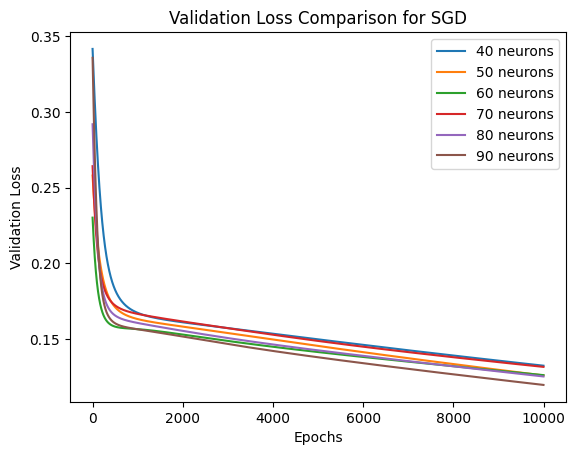

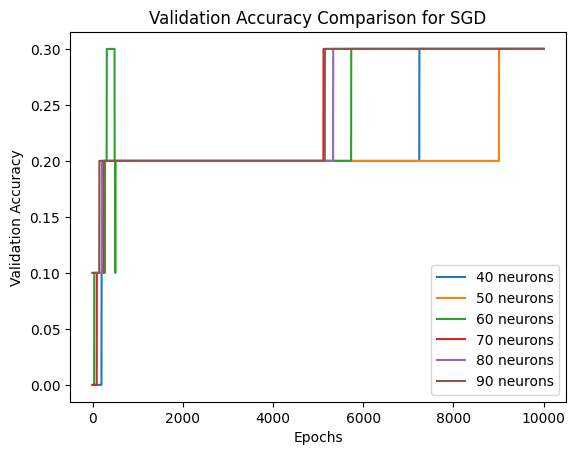

In [ ]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history1.history['val_loss'])
plt.plot(history_sgd2.history['val_loss'])
plt.plot(history_sgd3.history['val_loss'])
plt.plot(history_sgd4.history['val_loss'])
plt.plot(history_sgd5.history['val_loss'])
plt.plot(history_sgd6.history['val_loss'])
plt.title('Validation Loss Comparison for SGD')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

# Plot validation accuracy
plt.plot(history1.history['val_accuracy'])
plt.plot(history_sgd2.history['val_accuracy'])
plt.plot(history_sgd3.history['val_accuracy'])
plt.plot(history_sgd4.history['val_accuracy'])
plt.plot(history_sgd5.history['val_accuracy'])
plt.plot(history_sgd6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison for SGD')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()


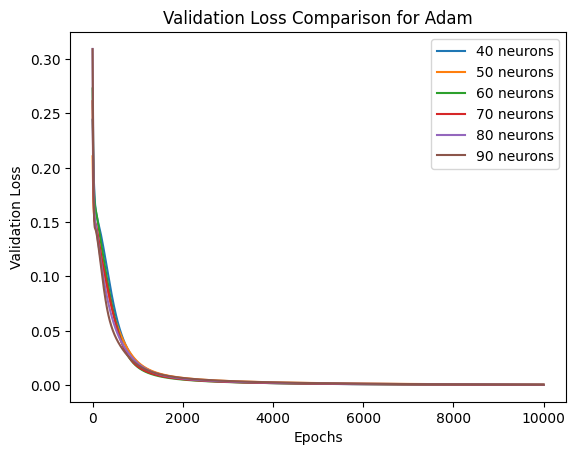

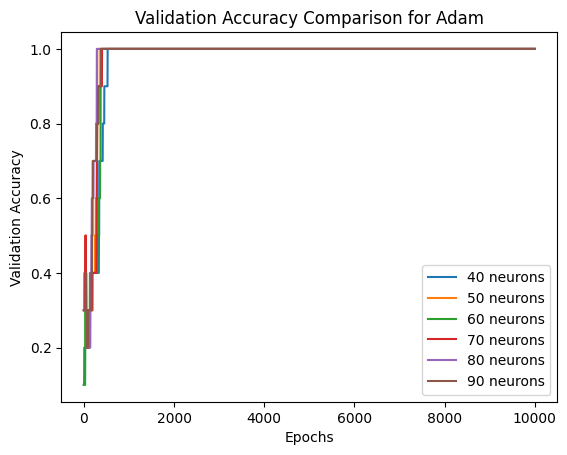

In [ ]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history_adam1.history['val_loss'])
plt.plot(history_adam2.history['val_loss'])
plt.plot(history_adam3.history['val_loss'])
plt.plot(history_adam4.history['val_loss'])
plt.plot(history_adam5.history['val_loss'])
plt.plot(history_adam6.history['val_loss'])
plt.title('Validation Loss Comparison for Adam')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

# Plot validation accuracy
plt.plot(history_adam1.history['val_accuracy'])
plt.plot(history_adam2.history['val_accuracy'])
plt.plot(history_adam3.history['val_accuracy'])
plt.plot(history_adam4.history['val_accuracy'])
plt.plot(history_adam5.history['val_accuracy'])
plt.plot(history_adam6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison for Adam')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

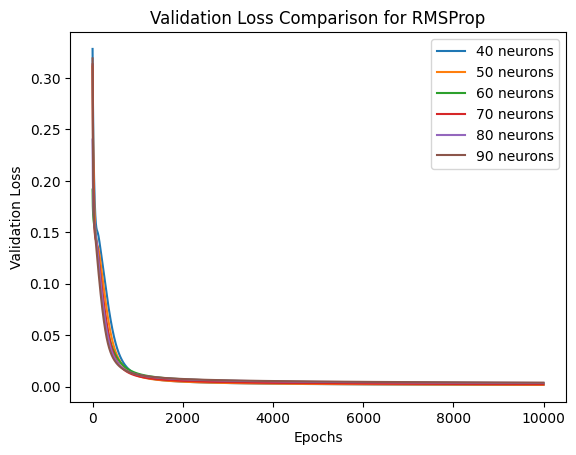

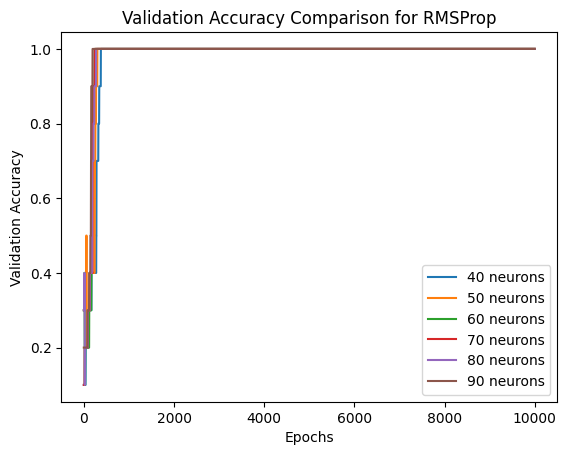

In [ ]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(history_rms1.history['val_loss'])
plt.plot(history_rms2.history['val_loss'])
plt.plot(history_rms3.history['val_loss'])
plt.plot(history_rms4.history['val_loss'])
plt.plot(history_rms5.history['val_loss'])
plt.plot(history_rms6.history['val_loss'])
plt.title('Validation Loss Comparison for RMSProp')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()

# Plot validation accuracy
plt.plot(history_rms1.history['val_accuracy'])
plt.plot(history_rms2.history['val_accuracy'])
plt.plot(history_rms3.history['val_accuracy'])
plt.plot(history_rms4.history['val_accuracy'])
plt.plot(history_rms5.history['val_accuracy'])
plt.plot(history_rms6.history['val_accuracy'])
plt.title('Validation Accuracy Comparison for RMSProp')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(['40 neurons', '50 neurons', '60 neurons','70 neurons','80 neurons','90 neurons'])
plt.show()
